# Environmental Justice in Berlin City

### Installations

In [1]:
# !pip3 install --upgrade pip

In [36]:
# %pip install geopandas
# %pip install tabulate
# %pip install contextily
# %pip install shapely
# %pip install mapclassify

### Import Libraries

In [37]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import Point

import folium

import matplotlib.pyplot as plt
%matplotlib inline

import contextily as cx

import mapclassify

### Display Imports & Their Versions

In [2]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['geopandas', geopandas.__version__],
    ['Folium', folium.__version__],
    ['Contextily', cx.__version__],
    ['Map Classify', mapclassify.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| geopandas          | 1.0.1     |
+--------------------+-----------+
| Folium             | 0.19.4    |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+
| Map Classify       | 2.8.1     |
+--------------------+-----------+


### Import Dataset

In [3]:
gdf = geopandas.read_file("data/LOR-Planungsraeume.geojson")

gdf

,Name,description,altitudeMode,tessellate,KOORDINATE,BEZNAME,QUELLEURL,ERSTELLDAT,PGRNAME,QUELLE,...,LIZENZ,BZRNAME,PGR,FLAECHE_HA,Field_1,FID,EMAIL,IBR,BZR,geometry
0,Lützowstraße,None,clampToGround,1,WGS 1984 Web Mercator (Auxiliary Sphere),Mitte,"<a target=""_blank"" href=""http://www.Statistik-...",16.10.2012,Zentrum,Amt für Statistik Berlin-Brandenburg,...,CC-BY 3.0 Namensnennung,Tiergarten Süd,0101,"52,0727",Lützowstraße,2,RBS@Statistik-BBB.de,12,010111,"MULTIPOLYGON (((13.34923 52.50307, 13.34955 52..."
1,Nördlicher Landwehrkanal,None,clampToGround,1,WGS 1984 Web Mercator (Auxiliary Sphere),Mitte,"<a target=""_blank"" href=""http://www.Statistik-...",16.10.2012,Zentrum,Amt für Statistik Berlin-Brandenburg,...,CC-BY 3.0 Namensnennung,Tiergarten Süd,0101,"93,1565",Nördlicher Landwehrkanal,4,RBS@Statistik-BBB.de,12,010111,"MULTIPOLYGON (((13.37331 52.50376, 13.37344 52..."
2,Ackerstraße,None,clampToGround,1,WGS 1984 Web Mercator (Auxiliary Sphere),Spandau,"<a target=""_blank"" href=""http://www.Statistik-...",16.10.2012,SPA 1,Amt für Statistik Berlin-Brandenburg,...,CC-BY 3.0 Namensnennung,Spandau Mitte,0501,"49,6968",Ackerstraße,176,RBS@Statistik-BBB.de,24,050103,"MULTIPOLYGON (((13.19134 52.54872, 13.1916 52...."
3,Unter den Linden Süd,None,clampToGround,1,WGS 1984 Web Mercator (Auxiliary Sphere),Mitte,"<a target=""_blank"" href=""http://www.Statistik-...",16.10.2012,Zentrum,Amt für Statistik Berlin-Brandenburg,...,CC-BY 3.0 Namensnennung,Regierungsviertel,0101,"54,8892",Unter den Linden Süd,7,RBS@Statistik-BBB.de,11,010112,"MULTIPOLYGON (((13.40375 52.51709, 13.40226 52..."
4,Leipziger Straße,None,clampToGround,1,WGS 1984 Web Mercator (Auxiliary Sphere),Mitte,"<a target=""_blank"" href=""http://www.Statistik-...",16.10.2012,Zentrum,Amt für Statistik Berlin-Brandenburg,...,CC-BY 3.0 Namensnennung,Regierungsviertel,0101,"76,0494",Leipziger Straße,8,RBS@Statistik-BBB.de,11,010112,"MULTIPOLYGON (((13.39049 52.5076, 13.39212 52...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,Rollbergesiedlung,None,clampToGround,1,WGS 1984 Web Mercator (Auxiliary Sphere),Reinickendorf,"<a target=""_blank"" href=""http://www.Statistik-...",16.10.2012,Waidmannslust,Amt für Statistik Berlin-Brandenburg,...,CC-BY 3.0 Namensnennung,MV 2,1230,"49,9428",Rollbergesiedlung,444,RBS@Statistik-BBB.de,24,123022,"MULTIPOLYGON (((13.3227 52.6055, 13.32406 52.6..."
443,Wittenau Nord,None,clampToGround,1,WGS 1984 Web Mercator (Auxiliary Sphere),Reinickendorf,"<a target=""_blank"" href=""http://www.Statistik-...",16.10.2012,Waidmannslust,Amt für Statistik Berlin-Brandenburg,...,CC-BY 3.0 Namensnennung,Nord 2,1230,"248,6376",Wittenau Nord,436,RBS@Statistik-BBB.de,24,123012,"MULTIPOLYGON (((13.31311 52.60078, 13.31326 52..."
444,Märkisches Zentrum,None,clampToGround,1,WGS 1984 Web Mercator (Auxiliary Sphere),Reinickendorf,"<a target=""_blank"" href=""http://www.Statistik-...",16.10.2012,Waidmannslust,Amt für Statistik Berlin-Brandenburg,...,CC-BY 3.0 Namensnennung,MV 1,1230,"113,335",Märkisches Zentrum,440,RBS@Statistik-BBB.de,24,123021,"MULTIPOLYGON (((13.36063 52.60249, 13.36143 52..."
445,Waidmannslust,None,clampToGround,1,WGS 1984 Web Mercator (Auxiliary Sphere),Reinickendorf,"<a target=""_blank"" href=""http://www.Statistik-...",16.10.2012,Waidmannslust,Amt für Statistik Berlin-Brandenburg,...,CC-BY 3.0 Namensnennung,Nord 2,1230,"172,7543",Waidmannslust,437,RBS@Statistik-BBB.de,24,123012,"MULTIPOLYGON (((13.31508 52.61119, 13.31483 52..."


### Retrieve Descriptive Statistics About Dataset

In [4]:
gdf.describe(include='all')

,Name,description,altitudeMode,tessellate,KOORDINATE,BEZNAME,QUELLEURL,ERSTELLDAT,PGRNAME,QUELLE,...,LIZENZ,BZRNAME,PGR,FLAECHE_HA,Field_1,FID,EMAIL,IBR,BZR,geometry
count,447,0,447,447.0,447,447,447,447,447,447,...,447,447,447,447,447,447,447,447,447,447
unique,446,0,1,NaN,1,12,1,1,60,1,...,1,138,60,447,446,447,1,4,138,447
top,Schloßstraße,NaN,clampToGround,NaN,WGS 1984 Web Mercator (Auxiliary Sphere),Charlottenburg-Wilmersdorf,"<a target=""_blank"" href=""http://www.Statistik-...",16.10.2012,Neukölln,Amt für Statistik Berlin-Brandenburg,...,CC-BY 3.0 Namensnennung,Lichtenrade,0801,"52,0727",Schloßstraße,2,RBS@Statistik-BBB.de,24,070707,MULTIPOLYGON (((13.34923249136374 52.503072886...
freq,2,NaN,447,NaN,447,57,447,447,18,447,...,447,7,18,1,2,1,447,231,7,1
mean,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Retrieve Number of Unique Values & List Unique Values For Each Feature

In [5]:
unique_cols_to_check = [
    "Name",
    "description",
    "altitudeMode",
    "tessellate",
    "KOORDINATE",
    "BEZNAME",
    "QUELLEURL",
    "ERSTELLDAT",
    "PGRNAME",
    "QUELLE",
    "LIZENZ",
    "BZRNAME",
    "PGR",
    "FLAECHE_HA",
    "Field_1",
    "FID",
    "EMAIL",
    "IBR",
    "BZR",
    "geometry"
]

for col in unique_cols_to_check:
    u_val = gdf[col].unique()
    if len(u_val) < 80:
        print(f"{col} ({len(u_val)})\n{u_val}")
    else: 
        print(f"{col} ({len(u_val)})")
    print()

Name (446)

description (1)
[None]

altitudeMode (1)
['clampToGround']

tessellate (1)
[1]

KOORDINATE (1)
['WGS 1984 Web Mercator (Auxiliary Sphere)']

BEZNAME (12)
['Mitte' 'Spandau' 'Friedrichshain-Kreuzberg' 'Pankow'
 'Charlottenburg-Wilmersdorf' 'Steglitz-Zehlendorf' 'Tempelhof-Schöneberg'
 'Neukölln' 'Marzahn-Hellersdorf' 'Lichtenberg' 'Treptow-Köpenick'
 'Reinickendorf']

QUELLEURL (1)
['<a target="_blank" href="http://www.Statistik-Berlin-Brandenburg">www.Statistik-Berlin-Brandenburg</a>']

ERSTELLDAT (1)
['16.10.2012']

PGRNAME (60)
['Zentrum' 'SPA 1' 'Gesundbrunnen' 'Moabit' 'Wedding' 'Kreuzberg Nord'
 'Kreuzberg Ost' 'Kreuzberg Süd' 'Friedrichshain Ost'
 'Friedrichshain West' 'Südliches Pankow' 'Südliches Weißensee' 'Buch'
 'Nördliches Pankow' 'Nördliches Weißensee' 'Südlicher Prenzlauer Berg'
 'Nördlicher Prenzlauer Berg' 'CW 2' 'CW 1' 'CW 4' 'CW 3' 'CW 5' 'CW 6'
 'SPA 2' 'Region A' 'SPA 4' 'Region B' 'Region C' 'Region D'
 'Schöneberg Nord' 'Friedenau' 'Schöneberg Süd' 'Ma

### Drop Unnecessary Features

In [6]:
cols_to_drop = [
    "description",
    "altitudeMode",
    "tessellate",
    "KOORDINATE",
    "QUELLEURL",
    "ERSTELLDAT",
    "QUELLE",
    "LIZENZ",
    "EMAIL"
]

gdf.drop(columns=cols_to_drop, inplace=True)

gdf

,Name,BEZNAME,PGRNAME,PLR,GEBIETSTAN,BEZ,PLRNAME,BZRNAME,PGR,FLAECHE_HA,Field_1,FID,IBR,BZR,geometry
0,Lützowstraße,Mitte,Zentrum,01011103,31.07.2012,01,Lützowstraße,Tiergarten Süd,0101,"52,0727",Lützowstraße,2,12,010111,"MULTIPOLYGON (((13.34923 52.50307, 13.34955 52..."
1,Nördlicher Landwehrkanal,Mitte,Zentrum,01011105,31.07.2012,01,Nördlicher Landwehrkanal,Tiergarten Süd,0101,"93,1565",Nördlicher Landwehrkanal,4,12,010111,"MULTIPOLYGON (((13.37331 52.50376, 13.37344 52..."
2,Ackerstraße,Spandau,SPA 1,05010313,31.07.2012,05,Ackerstraße,Spandau Mitte,0501,"49,6968",Ackerstraße,176,24,050103,"MULTIPOLYGON (((13.19134 52.54872, 13.1916 52...."
3,Unter den Linden Süd,Mitte,Zentrum,01011203,31.07.2012,01,Unter den Linden Süd,Regierungsviertel,0101,"54,8892",Unter den Linden Süd,7,11,010112,"MULTIPOLYGON (((13.40375 52.51709, 13.40226 52..."
4,Leipziger Straße,Mitte,Zentrum,01011204,31.07.2012,01,Leipziger Straße,Regierungsviertel,0101,"76,0494",Leipziger Straße,8,11,010112,"MULTIPOLYGON (((13.39049 52.5076, 13.39212 52...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,Rollbergesiedlung,Reinickendorf,Waidmannslust,12302212,31.07.2012,12,Rollbergesiedlung,MV 2,1230,"49,9428",Rollbergesiedlung,444,24,123022,"MULTIPOLYGON (((13.3227 52.6055, 13.32406 52.6..."
443,Wittenau Nord,Reinickendorf,Waidmannslust,12301204,31.07.2012,12,Wittenau Nord,Nord 2,1230,"248,6376",Wittenau Nord,436,24,123012,"MULTIPOLYGON (((13.31311 52.60078, 13.31326 52..."
444,Märkisches Zentrum,Reinickendorf,Waidmannslust,12302108,31.07.2012,12,Märkisches Zentrum,MV 1,1230,"113,335",Märkisches Zentrum,440,24,123021,"MULTIPOLYGON (((13.36063 52.60249, 13.36143 52..."
445,Waidmannslust,Reinickendorf,Waidmannslust,12301205,31.07.2012,12,Waidmannslust,Nord 2,1230,"172,7543",Waidmannslust,437,24,123012,"MULTIPOLYGON (((13.31508 52.61119, 13.31483 52..."


### Rename Features As Needed

In [7]:
cols_to_rename = {
    "Name": "name",
    "BEZNAME": "city",
    "PGRNAME": "pgr_name",
    "PLR": "plr",
    "GEBIETSTAN": "territory",
    "BEZ": "bez",
    "PLRNAME": "plr_name",
    "BZRNAME": "bzr_name",
    "PGR": "pgr",
    "FLAECHE_HA": "flaeche_ha",
    "Field_1": "field_name",
    "FID": "f_id",
    "IBR": "ibr",
    "BZR": "bzr",
    "KOORDINATE": "geomtery"
}

gdf.rename(columns=cols_to_rename, inplace=True)

gdf

,name,city,pgr_name,plr,territory,bez,plr_name,bzr_name,pgr,flaeche_ha,field_name,f_id,ibr,bzr,geometry
0,Lützowstraße,Mitte,Zentrum,01011103,31.07.2012,01,Lützowstraße,Tiergarten Süd,0101,"52,0727",Lützowstraße,2,12,010111,"MULTIPOLYGON (((13.34923 52.50307, 13.34955 52..."
1,Nördlicher Landwehrkanal,Mitte,Zentrum,01011105,31.07.2012,01,Nördlicher Landwehrkanal,Tiergarten Süd,0101,"93,1565",Nördlicher Landwehrkanal,4,12,010111,"MULTIPOLYGON (((13.37331 52.50376, 13.37344 52..."
2,Ackerstraße,Spandau,SPA 1,05010313,31.07.2012,05,Ackerstraße,Spandau Mitte,0501,"49,6968",Ackerstraße,176,24,050103,"MULTIPOLYGON (((13.19134 52.54872, 13.1916 52...."
3,Unter den Linden Süd,Mitte,Zentrum,01011203,31.07.2012,01,Unter den Linden Süd,Regierungsviertel,0101,"54,8892",Unter den Linden Süd,7,11,010112,"MULTIPOLYGON (((13.40375 52.51709, 13.40226 52..."
4,Leipziger Straße,Mitte,Zentrum,01011204,31.07.2012,01,Leipziger Straße,Regierungsviertel,0101,"76,0494",Leipziger Straße,8,11,010112,"MULTIPOLYGON (((13.39049 52.5076, 13.39212 52...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,Rollbergesiedlung,Reinickendorf,Waidmannslust,12302212,31.07.2012,12,Rollbergesiedlung,MV 2,1230,"49,9428",Rollbergesiedlung,444,24,123022,"MULTIPOLYGON (((13.3227 52.6055, 13.32406 52.6..."
443,Wittenau Nord,Reinickendorf,Waidmannslust,12301204,31.07.2012,12,Wittenau Nord,Nord 2,1230,"248,6376",Wittenau Nord,436,24,123012,"MULTIPOLYGON (((13.31311 52.60078, 13.31326 52..."
444,Märkisches Zentrum,Reinickendorf,Waidmannslust,12302108,31.07.2012,12,Märkisches Zentrum,MV 1,1230,"113,335",Märkisches Zentrum,440,24,123021,"MULTIPOLYGON (((13.36063 52.60249, 13.36143 52..."
445,Waidmannslust,Reinickendorf,Waidmannslust,12301205,31.07.2012,12,Waidmannslust,Nord 2,1230,"172,7543",Waidmannslust,437,24,123012,"MULTIPOLYGON (((13.31508 52.61119, 13.31483 52..."


## Data Visualizations

### Non-Interactive Visualization

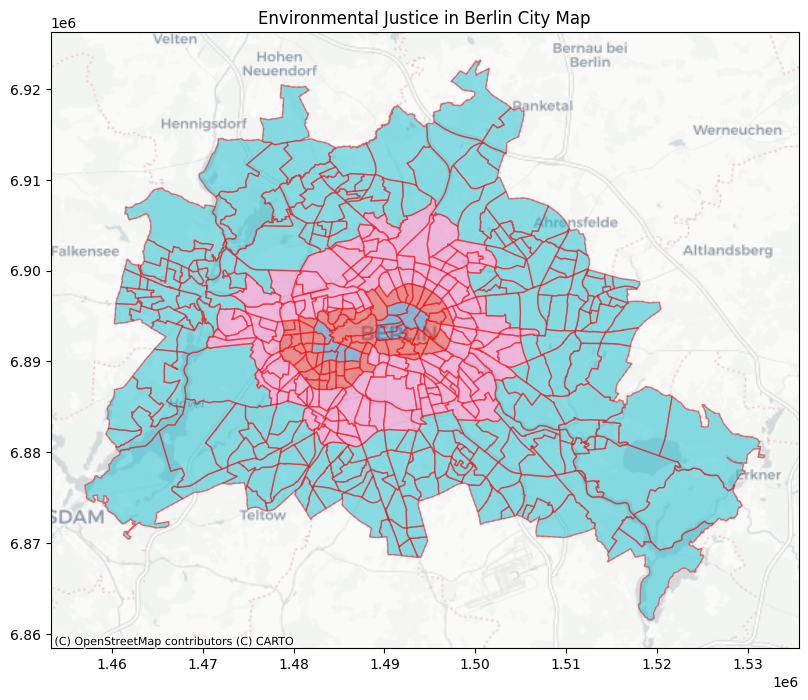

In [8]:
gdf_plot = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(24, 8))
gdf_plot.plot(column='ibr', ax=ax, alpha=0.5, edgecolor="red")

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("Environmental Justice in Berlin City Map")

plt.show()

### Interactive Data Visualization

In [9]:
gdf.explore(
    m = folium.Map(
        location=[52.5, 13.45],
        tiles='OpenStreetMap', # CartoDB Voyager, OpenStreetMap
        zoom_start=10,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': 'red',
        'weight': 1,
        'opacity': 0.75,
        'fill': True,
        'fillColor': '#FF474C',
        'fillOpacity': 0.35
    },
    highlight_kwds = {
        'stroke': True,
        'color': 'green',
        'weight': 2,
        'opacity': 1,
        'fill': True,
        'fillColor': '#88e788',
        'fillOpacity': 0.35
    },
    tooltip_kwds = {
        'labels': True,
        'aliases': [
            "Name",
            "City",
            "PGR Name",
            "PLR",
            "Territory",
            "BEZ",
            "PLR Name",
            "BZR Name",
            "PGR",
            "Flaeche Ha",
            "Field Name",
            "F ID",
            "IBR",
            "BZR"
        ]
    }
)

## Time For Fun With Functions

### Append Geometry Type Feature

In [10]:
print("Geometry Type")

gdf_gt = gdf[
    [
        'name',
        'city',
        'pgr_name',
        'plr',
        'territory',
        'bez',
        'plr_name',
        'bzr_name',
        'pgr',
        'flaeche_ha',
        'field_name',
        'f_id',
        'ibr',
        'bzr',
        'geometry'
    ]
].copy()
gdf_gt['geometry_type'] = gdf.geom_type

gdf_gt

Geometry Type


,name,city,pgr_name,plr,territory,bez,plr_name,bzr_name,pgr,flaeche_ha,field_name,f_id,ibr,bzr,geometry,geometry_type
0,Lützowstraße,Mitte,Zentrum,01011103,31.07.2012,01,Lützowstraße,Tiergarten Süd,0101,"52,0727",Lützowstraße,2,12,010111,"MULTIPOLYGON (((13.34923 52.50307, 13.34955 52...",MultiPolygon
1,Nördlicher Landwehrkanal,Mitte,Zentrum,01011105,31.07.2012,01,Nördlicher Landwehrkanal,Tiergarten Süd,0101,"93,1565",Nördlicher Landwehrkanal,4,12,010111,"MULTIPOLYGON (((13.37331 52.50376, 13.37344 52...",MultiPolygon
2,Ackerstraße,Spandau,SPA 1,05010313,31.07.2012,05,Ackerstraße,Spandau Mitte,0501,"49,6968",Ackerstraße,176,24,050103,"MULTIPOLYGON (((13.19134 52.54872, 13.1916 52....",MultiPolygon
3,Unter den Linden Süd,Mitte,Zentrum,01011203,31.07.2012,01,Unter den Linden Süd,Regierungsviertel,0101,"54,8892",Unter den Linden Süd,7,11,010112,"MULTIPOLYGON (((13.40375 52.51709, 13.40226 52...",MultiPolygon
4,Leipziger Straße,Mitte,Zentrum,01011204,31.07.2012,01,Leipziger Straße,Regierungsviertel,0101,"76,0494",Leipziger Straße,8,11,010112,"MULTIPOLYGON (((13.39049 52.5076, 13.39212 52....",MultiPolygon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,Rollbergesiedlung,Reinickendorf,Waidmannslust,12302212,31.07.2012,12,Rollbergesiedlung,MV 2,1230,"49,9428",Rollbergesiedlung,444,24,123022,"MULTIPOLYGON (((13.3227 52.6055, 13.32406 52.6...",MultiPolygon
443,Wittenau Nord,Reinickendorf,Waidmannslust,12301204,31.07.2012,12,Wittenau Nord,Nord 2,1230,"248,6376",Wittenau Nord,436,24,123012,"MULTIPOLYGON (((13.31311 52.60078, 13.31326 52...",MultiPolygon
444,Märkisches Zentrum,Reinickendorf,Waidmannslust,12302108,31.07.2012,12,Märkisches Zentrum,MV 1,1230,"113,335",Märkisches Zentrum,440,24,123021,"MULTIPOLYGON (((13.36063 52.60249, 13.36143 52...",MultiPolygon
445,Waidmannslust,Reinickendorf,Waidmannslust,12301205,31.07.2012,12,Waidmannslust,Nord 2,1230,"172,7543",Waidmannslust,437,24,123012,"MULTIPOLYGON (((13.31508 52.61119, 13.31483 52...",MultiPolygon


### Add Distance Features to Dataset

In [11]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [12]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

,name,city,pgr_name,plr,territory,bez,plr_name,bzr_name,pgr,flaeche_ha,field_name,f_id,ibr,bzr,geometry,dist_from_harvard,frechet_dist_from_harvard,hausdorff_dist_from_harvard
0,Lützowstraße,Mitte,Zentrum,01011103,31.07.2012,01,Lützowstraße,Tiergarten Süd,0101,"52,0727",Lützowstraße,2,12,010111,"MULTIPOLYGON (((387952.649 5818274.583, 387974...",6.977452e+06,6.978437e+06,6.978437e+06
1,Nördlicher Landwehrkanal,Mitte,Zentrum,01011105,31.07.2012,01,Nördlicher Landwehrkanal,Tiergarten Süd,0101,"93,1565",Nördlicher Landwehrkanal,4,12,010111,"MULTIPOLYGON (((389588.703 5818313.423, 389598...",6.977223e+06,6.978950e+06,6.978950e+06
2,Ackerstraße,Spandau,SPA 1,05010313,31.07.2012,05,Ackerstraße,Spandau Mitte,0501,"49,6968",Ackerstraße,176,24,050103,"MULTIPOLYGON (((377363.976 5823608.489, 377375...",6.965584e+06,6.966875e+06,6.966875e+06
3,Unter den Linden Süd,Mitte,Zentrum,01011203,31.07.2012,01,Unter den Linden Süd,Regierungsviertel,0101,"54,8892",Unter den Linden Süd,7,11,010112,"MULTIPOLYGON (((391687.623 5819749.969, 391590...",6.978574e+06,6.979847e+06,6.979847e+06
4,Leipziger Straße,Mitte,Zentrum,01011204,31.07.2012,01,Leipziger Straße,Regierungsviertel,0101,"76,0494",Leipziger Straße,8,11,010112,"MULTIPOLYGON (((390764.4 5818715.2, 390875.243...",6.979157e+06,6.980375e+06,6.980375e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,Rollbergesiedlung,Reinickendorf,Waidmannslust,12302212,31.07.2012,12,Rollbergesiedlung,MV 2,1230,"49,9428",Rollbergesiedlung,444,24,123022,"MULTIPOLYGON (((386416.939 5829708.387, 386510...",6.969861e+06,6.970930e+06,6.970930e+06
443,Wittenau Nord,Reinickendorf,Waidmannslust,12301204,31.07.2012,12,Wittenau Nord,Nord 2,1230,"248,6376",Wittenau Nord,436,24,123012,"MULTIPOLYGON (((385754.868 5829198.437, 385765...",6.969466e+06,6.971478e+06,6.971478e+06
444,Märkisches Zentrum,Reinickendorf,Waidmannslust,12302108,31.07.2012,12,Märkisches Zentrum,MV 1,1230,"113,335",Märkisches Zentrum,440,24,123021,"MULTIPOLYGON (((388977.75 5829314.168, 389032....",6.971370e+06,6.972526e+06,6.972526e+06
445,Waidmannslust,Reinickendorf,Waidmannslust,12301205,31.07.2012,12,Waidmannslust,Nord 2,1230,"172,7543",Waidmannslust,437,24,123012,"MULTIPOLYGON (((385915.822 5830352.995, 385898...",6.968780e+06,6.970567e+06,6.970567e+06


### Retrieve Coordinates

In [13]:
gdf_get_coords = gdf.get_coordinates(include_z=True)
gdf_count_coords = gdf.count_coordinates()
gdf_count_geos = gdf.count_geometries()

print(f"GDF Coordinates:\n{gdf_get_coords}\n")
print(f"GDF Count Coordinates:\n{gdf_count_coords}\n")
print(f"GDF Count Geometries:\n{gdf_count_geos}")

GDF Coordinates:
             x          y   z
0    13.349232  52.503073 NaN
0    13.349552  52.502996 NaN
0    13.349859  52.502921 NaN
0    13.350204  52.502838 NaN
0    13.351391  52.502552 NaN
..         ...        ...  ..
446  13.291100  52.602664 NaN
446  13.291306  52.602650 NaN
446  13.291364  52.602661 NaN
446  13.291931  52.602612 NaN
446  13.292031  52.602610 NaN

[60781 rows x 3 columns]

GDF Count Coordinates:
0       89
1      142
2       60
3       63
4       96
      ... 
442     93
443    227
444    142
445    428
446    302
Length: 447, dtype: int32

GDF Count Geometries:
0      1
1      1
2      1
3      1
4      1
      ..
442    1
443    1
444    1
445    1
446    1
Length: 447, dtype: int32


### Some Basic Functions

In [35]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}")

is_simple:
True    447
dtype: int64

is_valid:
True    447
dtype: int64

is_valid_reason:
Valid Geometry    447
dtype: int64

has_z:
False    447
dtype: int64


### Set-Theoretic Methods

In [15]:
# Clip the GeoDataFrame by the specified rectangle
gdf_clip_by_rect = gdf.clip_by_rect(0, 40, 13.25, 60)

# Remove rows with empty geometries
gdf_clip_by_rect = gdf_clip_by_rect[~gdf_clip_by_rect.geometry.is_empty]

# Display the resulting GeoDataFrame
gdf_clip_by_rect

2      POLYGON ((13.19134 52.54872, 13.1916 52.54644,...
58     POLYGON ((13.22095 52.51362, 13.21975 52.51358...
62     POLYGON ((13.24665 52.52441, 13.24671 52.52447...
72     POLYGON ((13.12769 52.54977, 13.12788 52.54972...
86     POLYGON ((13.14422 52.55212, 13.14389 52.5519,...
                             ...                        
349    POLYGON ((13.22446 52.42949, 13.22401 52.42982...
350    POLYGON ((13.24075 52.45217, 13.24149 52.45235...
351    POLYGON ((13.24742 52.46166, 13.24751 52.46674...
439    POLYGON ((13.22739 52.56741, 13.22807 52.56798...
440    POLYGON ((13.20162 52.60616, 13.20163 52.60655...
Length: 62, dtype: geometry

### Some More Functions

In [16]:
gdf_projected.area

0      5.224115e+05
1      9.345763e+05
2      4.986174e+05
3      5.506619e+05
4      7.629438e+05
           ...     
442    5.010649e+05
443    2.494522e+06
444    1.137053e+06
445    1.733214e+06
446    2.225867e+06
Length: 447, dtype: float64

In [17]:
gdf.boundary

0      MULTILINESTRING ((13.34923 52.50307, 13.34955 ...
1      MULTILINESTRING ((13.37331 52.50376, 13.37344 ...
2      MULTILINESTRING ((13.19134 52.54872, 13.1916 5...
3      MULTILINESTRING ((13.40375 52.51709, 13.40226 ...
4      MULTILINESTRING ((13.39049 52.5076, 13.39212 5...
                             ...                        
442    MULTILINESTRING ((13.3227 52.6055, 13.32406 52...
443    MULTILINESTRING ((13.31311 52.60078, 13.31326 ...
444    MULTILINESTRING ((13.36063 52.60249, 13.36143 ...
445    MULTILINESTRING ((13.31508 52.61119, 13.31483 ...
446    MULTILINESTRING ((13.29203 52.60261, 13.29207 ...
Length: 447, dtype: geometry

In [18]:
gdf.bounds

,minx,miny,maxx,maxy
0,13.349232,52.499663,13.367689,52.506370
1,13.351588,52.503235,13.377649,52.512546
2,13.191223,52.540675,13.206054,52.549966
3,13.381053,52.511796,13.403755,52.518587
4,13.386788,52.507603,13.406943,52.517086
...,...,...,...,...
442,13.320352,52.604653,13.339999,52.611282
443,13.300995,52.586058,13.337103,52.605478
444,13.336274,52.595918,13.364722,52.607302
445,13.300929,52.597069,13.336441,52.614867


In [19]:
gdf.total_bounds

array([13.08834555, 52.33823507, 13.76112129, 52.67547097])

In [20]:
gdf_projected.length

0      3246.478544
1      5135.889285
2      3258.730374
3      3981.577913
4      4651.325675
          ...     
442    3433.045800
443    8028.292555
444    5867.174288
445    8126.955120
446    7695.555789
Length: 447, dtype: float64

In [21]:
gdf.minimum_bounding_radius()

0      0.009310
1      0.013061
2      0.008228
3      0.011359
4      0.010178
         ...   
442    0.009846
443    0.018072
444    0.014961
445    0.017928
446    0.013347
Length: 447, dtype: float64

In [22]:
gdf.get_coordinates()

,x,y
0,13.349232,52.503073
0,13.349552,52.502996
0,13.349859,52.502921
0,13.350204,52.502838
0,13.351391,52.502552
...,...,...
446,13.291100,52.602664
446,13.291306,52.602650
446,13.291364,52.602661
446,13.291931,52.602612


In [23]:
gdf.count_coordinates()

0       89
1      142
2       60
3       63
4       96
      ... 
442     93
443    227
444    142
445    428
446    302
Length: 447, dtype: int32

In [24]:
gdf_projected.buffer(distance=125)

0      POLYGON ((387858.5 5818356.808, 387892.528 581...
1      POLYGON ((388233.938 5818429.817, 388228.255 5...
2      POLYGON ((377239.089 5823603.187, 377234.698 5...
3      POLYGON ((390260.273 5819440.033, 390214.583 5...
4      POLYGON ((390621.206 5818721.456, 390621.002 5...
                             ...                        
442    POLYGON ((386216.388 5829778.438, 386209.624 5...
443    POLYGON ((385019.148 5828678.619, 385034.814 5...
444    POLYGON ((387194.242 5828697.895, 387190.846 5...
445    POLYGON ((384829.281 5829784.696, 384826.535 5...
446    POLYGON ((383501.719 5829237.986, 383505.457 5...
Length: 447, dtype: geometry

In [25]:
gdf_projected.centroid

0        POINT (388596.53 5818307.88)
1      POINT (389114.473 5818791.592)
2      POINT (377856.731 5823216.394)
3      POINT (390881.458 5819529.425)
4       POINT (391277.97 5819140.194)
                    ...              
442     POINT (387009.329 5829948.94)
443    POINT (386078.547 5828565.849)
444    POINT (388366.183 5829243.885)
445    POINT (385990.611 5829845.592)
446    POINT (384520.503 5828765.258)
Length: 447, dtype: geometry

In [26]:
gdf.force_2d()

0      MULTIPOLYGON (((13.34923 52.50307, 13.34955 52...
1      MULTIPOLYGON (((13.37331 52.50376, 13.37344 52...
2      MULTIPOLYGON (((13.19134 52.54872, 13.1916 52....
3      MULTIPOLYGON (((13.40375 52.51709, 13.40226 52...
4      MULTIPOLYGON (((13.39049 52.5076, 13.39212 52....
                             ...                        
442    MULTIPOLYGON (((13.3227 52.6055, 13.32406 52.6...
443    MULTIPOLYGON (((13.31311 52.60078, 13.31326 52...
444    MULTIPOLYGON (((13.36063 52.60249, 13.36143 52...
445    MULTIPOLYGON (((13.31508 52.61119, 13.31483 52...
446    MULTIPOLYGON (((13.29203 52.60261, 13.29207 52...
Length: 447, dtype: geometry

In [28]:
gdf.active_geometry_name

'geometry'

### Aggregating & Exploding

In [29]:
gdf_city = gdf.dissolve(by='city')

gdf_city

,geometry,name,pgr_name,plr,territory,bez,plr_name,bzr_name,pgr,flaeche_ha,field_name,f_id,ibr,bzr
city,,,,,,,,,,,,,,
Charlottenburg-Wilmersdorf,"POLYGON ((13.28741 52.47017, 13.28712 52.4701,...",Königin-Elisabeth-Straße,CW 2,04020313,31.07.2012,04,Königin-Elisabeth-Straße,Westend,0402,"65,4753",Königin-Elisabeth-Straße,119,23,040203
Friedrichshain-Kreuzberg,"POLYGON ((13.40853 52.48714, 13.40841 52.48703...",Moritzplatz,Kreuzberg Nord,02010103,31.07.2012,02,Moritzplatz,Südliche Friedrichstadt,0201,"79,4303",Moritzplatz,43,12,020101
Lichtenberg,"POLYGON ((13.50149 52.48259, 13.50138 52.48259...",Falkenberg West,Hohenschönhausen Nord,11010205,31.07.2012,11,Falkenberg West,Neu-Hohenschönhausen Nord,1101,"78,9919",Falkenberg West,389,24,110102
Marzahn-Hellersdorf,"POLYGON ((13.58643 52.48109, 13.58636 52.48111...",Marzahner Promenade,Marzahn,10010207,31.07.2012,10,Marzahner Promenade,Marzahn Mitte,1001,"82,9772",Marzahner Promenade,358,24,100102
Mitte,"POLYGON ((13.34715 52.50358, 13.34599 52.50386...",Lützowstraße,Zentrum,01011103,31.07.2012,01,Lützowstraße,Tiergarten Süd,0101,"52,0727",Lützowstraße,2,12,010111
Neukölln,"POLYGON ((13.43867 52.41442, 13.4384 52.41435,...",Wissmannstraße,Neukölln,08010116,31.07.2012,08,Wissmannstraße,Schillerpromenade,0801,"16,4665",Wissmannstraße,279,23,080101
Pankow,"POLYGON ((13.43874 52.52877, 13.43832 52.52879...",Wilhelmsruh,Südliches Pankow,03040512,31.07.2012,03,Wilhelmsruh,Schönholz/Wilhelmsruh/Rosenthal,0304,"216,0681",Wilhelmsruh,80,24,030405
Reinickendorf,"POLYGON ((13.3321 52.56179, 13.33194 52.56174,...",Breitkopfbecken,Reinickendorf Ost,12103115,31.07.2012,12,Breitkopfbecken,Ost 1,1210,"71,7078",Breitkopfbecken,417,23,121031
Spandau,"POLYGON ((13.11819 52.44441, 13.11734 52.44482...",Ackerstraße,SPA 1,05010313,31.07.2012,05,Ackerstraße,Spandau Mitte,0501,"49,6968",Ackerstraße,176,24,050103


In [30]:
gdf_ibr = gdf.dissolve(by='ibr')

gdf_ibr

,geometry,name,city,pgr_name,plr,territory,bez,plr_name,bzr_name,pgr,flaeche_ha,field_name,f_id,bzr
ibr,,,,,,,,,,,,,,
11,"MULTIPOLYGON (((13.33524 52.49486, 13.33497 52...",Unter den Linden Süd,Mitte,Zentrum,01011203,31.07.2012,01,Unter den Linden Süd,Regierungsviertel,0101,"54,8892",Unter den Linden Süd,7,010112
12,"POLYGON ((13.32709 52.47746, 13.32432 52.47748...",Lützowstraße,Mitte,Zentrum,01011103,31.07.2012,01,Lützowstraße,Tiergarten Süd,0101,"52,0727",Lützowstraße,2,010111
23,"POLYGON ((13.32247 52.44476, 13.32097 52.44669...",Gesundbrunnen,Mitte,Gesundbrunnen,01033102,31.07.2012,01,Gesundbrunnen,Osloer Straße,0103,"65,5611",Gesundbrunnen,31,010331
24,"POLYGON ((13.17263 52.40732, 13.17085 52.40673...",Ackerstraße,Spandau,SPA 1,05010313,31.07.2012,05,Ackerstraße,Spandau Mitte,0501,"49,6968",Ackerstraße,176,050103


### Interface

In [ ]:
gdf.__geo_interface__

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

In [ ]:
for feature in gdf.iterfeatures():
    print(feature)

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

## Save Cleaned Dataset to File

In [34]:
new_file_name_and_path = 'data/cleaned_gdf_file.geojson'

gdf.to_file(new_file_name_and_path, driver="geojson")

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/